In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_rows",40) 

In [3]:
books_df = pd.read_csv("book.csv", encoding = "latin-1")


In [4]:
books_df.head()    # STEP 1 : VIEW THE DATA AND UNDERSTAND AND DETERMINE THE NO OF  LINE ITEMS 

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [5]:
# 10k line items and  3 columns

books_df[books_df["User.ID"]==162121] 

# Randomly checking on a user to understand their rating given 



,Unnamed: 0,User.ID,Book.Title,Book.Rating
9990,9991,162121,The Cloister Walk,7
9991,9992,162121,Open Water,5
9992,9993,162121,The Evolution of Jane,8
9993,9994,162121,AT PARADISE GATE,8
9994,9995,162121,I Should Have Stayed Home: The Worst Trips of ...,8
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [6]:
books_df.nunique()   # UNIQUE NO OF LINE ITMES FOR EACH COLUMN ,  UNIQUE NO OF BOOKS , UNIQUE NO OF RATINGS ,  UNIQUE NO OF USERS

# There are a total of user are 2182 and the total no of ratings provided is 10000




Unnamed: 0     10000
User.ID         2182
Book.Title      9659
Book.Rating       10
dtype: int64

In [7]:
books_df.shape

(10000, 4)

In [10]:
# fetching the average rating of every book
df = pd.DataFrame(books_df.groupby(["Book.Title"])["Book.Rating"].mean())
df

,Book.Rating
Book.Title,
"Jason, Madison &amp",8.0
Other Stories;Merril;1985;McClelland &amp,6.0
Repairing PC Drives &amp,4.0
'48,7.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0
...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",8.0
"\Well, there's your problem\: Cartoons",9.0
iI Paradiso Degli Orchi,7.0


In [11]:
# To find if there are any null values  ; We infer that there are no null values 
books_df.isna().sum()

Unnamed: 0     0
User.ID        0
Book.Title     0
Book.Rating    0
dtype: int64

In [12]:
books_df["Book.Rating"].value_counts()

8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: Book.Rating, dtype: int64

In [10]:
books_df["User.ID"].duplicated().sum()    #  no of user ids repeated in the dataset ; have multiple ratings

7818

In [13]:
# No of unique users IDS in the dataset  and no of rows are 10000
books_df["User.ID"].nunique()

2182

In [15]:
# The data of unique books 
books_df["Book.Title"].unique()

array(['Classical Mythology', 'Clara Callan', 'Decision in Normandy', ...,
       'How to Flirt: A Practical Guide', 'Twilight',
       'Kids Say the Darndest Things'], dtype=object)

In [43]:
books = books_df.rename({'User.ID':'UserID','Book.Title':"BookTitle",'Book.Rating':"BookRating"},axis=1)


In [44]:
books[books.duplicated()]

,Unnamed: 0,UserID,BookTitle,BookRating


In [46]:
books[books.duplicated(subset=["UserID","BookTitle"])]
# These are the books containing the same UseR ID WHO HAS RATED THE SAME BOOKS  , WE MUST DROP THEM

,Unnamed: 0,UserID,BookTitle,BookRating
2001,2002,278418,White Oleander : A Novel,5
3792,3793,1211,Black House,9
4745,4746,2033,The First Time,2
5051,5052,2152,Le nouveau soleil de Teur,7
5219,5220,2276,In the Beauty of the Lilies,10
7439,7440,3757,The Magician's Tale,7
9945,9946,162052,Rose,8


In [51]:
books.shape

(10000, 4)

In [48]:
clean_books = books.drop_duplicates(subset=["UserID","BookTitle"])


In [49]:
clean_books

,Unnamed: 0,UserID,BookTitle,BookRating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [52]:
clean_books.shape # THE DUPLICATE ROWS ARE BEING REMOVED

(9993, 4)

In [54]:
# Create a User INtercation Matrix ( Users in rows and books as products in columns and the ratimgs provided will be the Values)

User_books = books.pivot_table(index="UserID", columns = "BookTitle" , values = "BookRating")
# IMPORTANT : CREATING A PIVOT TABLE WITH INDEX AS USER ID , COLUMNS : BOOKS TITLE , VALUES = RATINGS 


In [55]:
User_books

BookTitle,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
UserID,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN


In [56]:
average_ratings_by_book = pd.DataFrame(books_df.groupby('Book.Title')['Book.Rating'].mean().sort_values(ascending=False))

average_ratings_by_book

,Book.Rating
Book.Title,
"Dr Mommy (From Here To Maternity) (Silhouette Desire, 1269)",10.0
The Piano Man's Daughter,10.0
Private Screening,10.0
"The Pilates Body: The Ultimate At-Home Guide to Strengthening, Lengthening, and Toning Your Body--Without Machines",10.0
Desert Solitaire,10.0
...,...
Buster Midnight's Cafe,1.0
Fatal Care,1.0
The Selfish Gene,1.0


In [30]:
average_ratings_Top_30= pd.DataFrame(books_df.groupby('Book.Title')['Book.Rating'].mean().sort_values(ascending=False)).head(30)


In [31]:
average_ratings_Top_30

,Book.Rating
Book.Title,
"Dr Mommy (From Here To Maternity) (Silhouette Desire, 1269)",10.0
The Piano Man's Daughter,10.0
Private Screening,10.0
"The Pilates Body: The Ultimate At-Home Guide to Strengthening, Lengthening, and Toning Your Body--Without Machines",10.0
Desert Solitaire,10.0
The Pillars of the Earth,10.0
Principia Discordia,10.0
COWBOY,10.0
Design for Dying,10.0


<Axes: xlabel='Book.Title'>

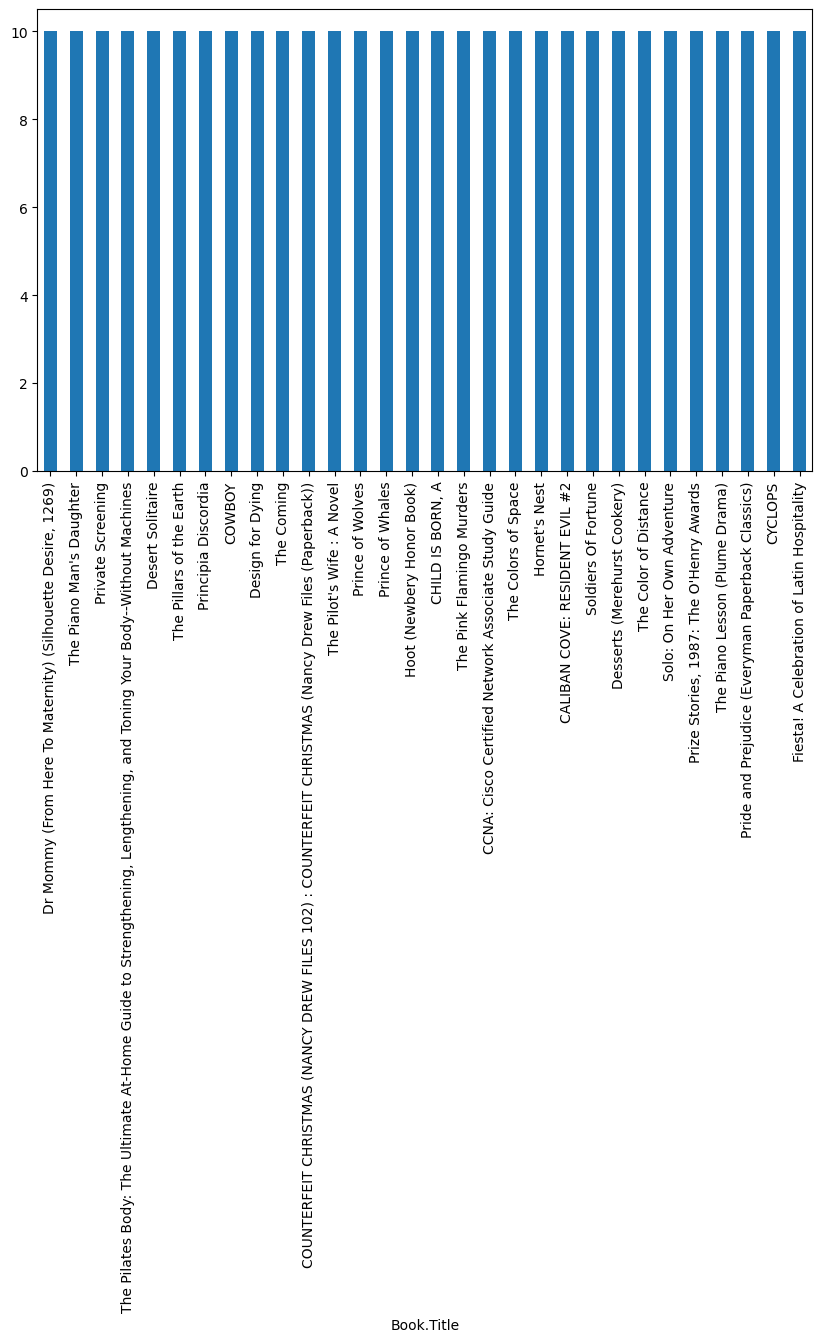

In [32]:
average_ratings_Top_30.plot.bar(legend=False, figsize=(10, 6))

In [15]:
User_books.values

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ...,  7., nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [57]:
# Replacing all the nans with 0 
User_books.fillna(0,inplace=True)

In [58]:
User_books

BookTitle,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
UserID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [62]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine , correlation
# COSINE 0 TO 1
# CORRELATION -1 TO 1

In [63]:
user_sim = 1 - pairwise_distances(User_books.values, metric = "cosine")
# RETREIVING THE DISTANCE BETWEEN EACH USER

In [64]:
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [65]:
user_sim_df = pd.DataFrame(user_sim)

In [66]:
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [67]:
user_sim_df.shape   # PLOTS USER VS USER AS THERE 2182

(2182, 2182)

In [68]:
# IF U OBSERVE YOU MUST IGNORE THE DIAGNAL VALUES AS USER 1 VS USER 1 WILL BE COSINE 1 

User_books.index


Int64Index([     8,      9,     10,     12,     14,     16,     17,     19,
                22,     26,
            ...
            278831, 278832, 278836, 278843, 278844, 278846, 278849, 278851,
            278852, 278854],
           dtype='int64', name='UserID', length=2182)

In [72]:
#Set the indexes  and columns of similiarites dataframe to the index using books dataframe

user_sim_df.index = clean_books.UserID.unique()
user_sim_df.columns = clean_books.UserID.unique()

In [73]:
user_sim_df

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
# WE CAN REMOVE THE DIAGNAL VALUES 

np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:5,0:5]

,276726,276729,276736,276737,276744
276726,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0


In [75]:
user_sim_df.sort_values([278843],ascending=False).head(100)

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
user_sim_df.idxmax(axis=1)[0:5]

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
dtype: int64

In [78]:
user_sim_df[276729]

276726    0.0
276729    0.0
276736    0.0
276737    0.0
276744    0.0
         ... 
162107    0.0
162109    0.0
162113    0.0
162121    0.0
162129    0.0
Name: 276729, Length: 2182, dtype: float64

In [80]:
user_sim_df[user_sim_df[278843]>0.08]

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129


In [86]:
clean_books[(clean_books['UserID']==278843) | (clean_books['UserID']==277959)]

,Unnamed: 0,UserID,BookTitle,BookRating
1352,1353,277959,Good Omens,8
1353,1354,277959,Il Dio Delle Piccole Cose,6
1354,1355,277959,The Songcatcher: A Ballad Novel,7
1355,1356,277959,Message in a Bottle,8
1356,1357,277959,Fatal Voyage,10
1357,1358,277959,Praying for Sleep,6
1358,1359,277959,Flashback,7
2353,2354,278843,The Mighty,9
2354,2355,278843,Adventures of Huckleberry Finn,7
2355,2356,278843,Murder on the Orient Express (Hercule Poirot M...,8


In [88]:
clean_books[(clean_books['UserID']==276726) |(clean_books['UserID']==276744)]    # checking with all related users

,Unnamed: 0,UserID,BookTitle,BookRating
0,1,276726,Classical Mythology,5
5,6,276744,The Kitchen God's Wife,7


In [89]:
clean_books[(clean_books['UserID']==276726) |(clean_books['UserID']==276729)]

,Unnamed: 0,UserID,BookTitle,BookRating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6


In [90]:
clean_books[(clean_books['UserID']==276726) |(clean_books['UserID']==276737)]

,Unnamed: 0,UserID,BookTitle,BookRating
0,1,276726,Classical Mythology,5
4,5,276737,The Mummies of Urumchi,6


In [91]:
from collections import Counter

def get_reco(customer_id):
         
        try :
            tem=list(user_sim_df.sort_values([customer_id],ascending=False).head(150).index)  
            
            # The rest other users similiar to customer_id passed having cosine value in descending ( most similar users with 
            # user_id provided)

            book_list=list(clean_books[clean_books["UserID"].isin(tem)]["BookTitle"])
           
             # Fetching the list of books that those similar users watched 

            #recommended_books= Counter(book_list).most_common()
            
            # Now we should recommend the most common books amoung that list , hence creating a counter
            
            recommended_books =set(book_list)-set(clean_books[clean_books["UserID"]==customer_id]["BookTitle"])

        
            if recommended_books==set():
                return  "please look for more similar customer"
            return recommended_books

        except :
            return " the user id isn't available"

In [92]:
get_reco(278843)   # recommendation for a specific user

{'28 Barbary Lane : A \\Tales of the City\\ Omnibus',
 '30 Things Everyone Should Know How to Do Before Turning 30',
 '7b',
 '8 Weeks to Optimum Health',
 'A Basic Guide to Archery (An Official U.S. Olympic Committee Sports Series)',
 'A Coral Kiss',
 'A Cup of Light',
 'A Fire in the Earth',
 'A Man of Steel',
 "A Mother's Trial",
 'A New Leash on Death',
 'A Perfect Stranger',
 'A Revolution in Kindness',
 'A Time to Kill',
 'ANGELS IN HELL',
 'Across the Bitter Sea',
 'Ada or Ardor a Family Chronicle (Vintage International)',
 'Affair',
 'After Caroline',
 "Against All Enemies: Inside America's War on Terror",
 "Agent Arthur's Arctic Adventure (Usborne Puzzle Adventures)",
 'All Fall Down',
 'All Night Long (Harlequin Presents, 2170)',
 'Almost a Princess',
 'Alternatives Games Exercises and Conversations for the Language Classroom (Pilgrims Longman Resource Books)',
 'Always',
 'Always A Bridesmaid (Harlequin American Romance, No 266)',
 'An Enigmatic Man  (Do Not Disturb!)',
 'An 

# My space : understanding of the code 



In [74]:
tem=list(user_sim_df.sort_values([8],ascending=False).head(150).index)  
# list of most similar users with userid provided and the row indexes of the corresponding users are stored

In [75]:
tem

[8,
 161755,
 161744,
 161749,
 161750,
 161751,
 161752,
 161753,
 161757,
 161407,
 161762,
 161765,
 161777,
 161778,
 161789,
 161792,
 161740,
 161738,
 161737,
 161730,
 161726,
 161715,
 161708,
 161706,
 161704,
 161696,
 161695,
 161694,
 161689,
 161685,
 161684,
 161681,
 161677,
 161794,
 161795,
 161799,
 161870,
 161908,
 161907,
 161903,
 161899,
 161892,
 161888,
 161883,
 161882,
 161881,
 161880,
 161878,
 161875,
 161873,
 161872,
 161866,
 161801,
 161861,
 161857,
 161853,
 161849,
 161847,
 161844,
 161843,
 161831,
 161830,
 161823,
 161816,
 161812,
 161810,
 161807,
 161669,
 161667,
 161664,
 161467,
 161530,
 161511,
 161510,
 161507,
 161505,
 161499,
 161498,
 161489,
 161482,
 161481,
 161480,
 161479,
 161478,
 161476,
 161466,
 161533,
 161462,
 161460,
 161459,
 161458,
 161455,
 161453,
 161448,
 161443,
 161441,
 161436,
 161434,
 161431,
 161423,
 161420,
 161532,
 161535,
 161662,
 161615,
 161656,
 161652,
 161649,
 161645,
 161638,
 161637,
 16163

In [76]:
book_list=list(books_df[books_df["User.ID"].isin(tem)]["Book.Title"])


In [77]:
book_list   # title of all the books watched by the most similar user ( in temp )with userid we provided

['Pacific Northwest',
 'A Soldier of the Great War',
 'Getting Well Again',
 'Northwest Wines and Wineries',
 'An Atmosphere of Eternity: Stories of India',
 'LONESOME DOVE',
 'Shabanu: Daughter of the Wind (Border Trilogy)',
 'Haveli (Laurel Leaf Books)',
 'Lieux dits',
 'The Dragons of Eden: Speculations on the Evolution of Human Intelligence',
 'The yawning heights',
 'Breathing Lessons',
 'The Joy Luck Club',
 'Heart of Darkness (Wordsworth Collection)',
 'The Angel Is Near',
 'The Tao of Pooh',
 'Seabiscuit',
 'The Prince',
 "Life's Little Instruction Book (Life's Little Instruction Books (Paperback))",
 'Starship Troopers',
 'The Ruby in the Smoke (Sally Lockhart Trilogy, Book 1)',
 'Black Beauty (Illustrated Classics)',
 "Anil's Ghost",
 'Prescription for Terror',
 'Modern Manners: An Etiquette Book for Rude People',
 'Turning Thirty',
 'Decipher',
 'My First Cousin Once Removed: Money, Madness, and the Family of Robert Lowell',
 'Standing Firm: A Vice-Presidential Memoir',
 'Te

In [84]:
recommended_books= Counter(book_list).most_common()
# create a counter with the books most read and suggest those to the user

recommended_books

In [85]:
recommended_books

[('Mrs. Mike', 2),
 ('Charlie and the Chocolate Factory', 2),
 ('Pacific Northwest', 1),
 ('A Soldier of the Great War', 1),
 ('Getting Well Again', 1),
 ('Northwest Wines and Wineries', 1),
 ('An Atmosphere of Eternity: Stories of India', 1),
 ('LONESOME DOVE', 1),
 ('Shabanu: Daughter of the Wind (Border Trilogy)', 1),
 ('Haveli (Laurel Leaf Books)', 1),
 ('Lieux dits', 1),
 ('The Dragons of Eden: Speculations on the Evolution of Human Intelligence',
  1),
 ('The yawning heights', 1),
 ('Breathing Lessons', 1),
 ('The Joy Luck Club', 1),
 ('Heart of Darkness (Wordsworth Collection)', 1),
 ('The Angel Is Near', 1),
 ('The Tao of Pooh', 1),
 ('Seabiscuit', 1),
 ('The Prince', 1),
 ("Life's Little Instruction Book (Life's Little Instruction Books (Paperback))",
  1),
 ('Starship Troopers', 1),
 ('The Ruby in the Smoke (Sally Lockhart Trilogy, Book 1)', 1),
 ('Black Beauty (Illustrated Classics)', 1),
 ("Anil's Ghost", 1),
 ('Prescription for Terror', 1),
 ('Modern Manners: An Etiquette 